In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

In [7]:
print('Python version:',platform.python_version())
print('Tensorflow version:',tf.__version__)
print('Keras version:',tf.keras.__version__)

Python version: 3.11.11
Tensorflow version: 2.18.0
Keras version: 3.8.0


In [9]:
mnist_dataset = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist_dataset.load_data()

print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

(_,IMAGE_WIDTH, IMAGE_HEIGHT)=x_train.shape
IMAGE_CHANNELS=1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [10]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


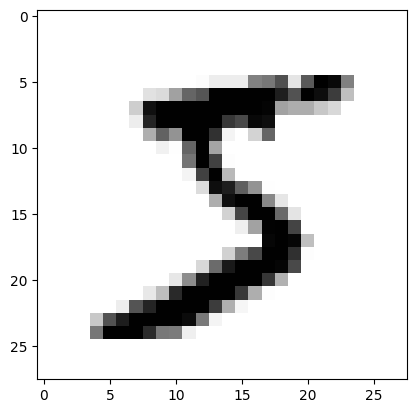

In [11]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

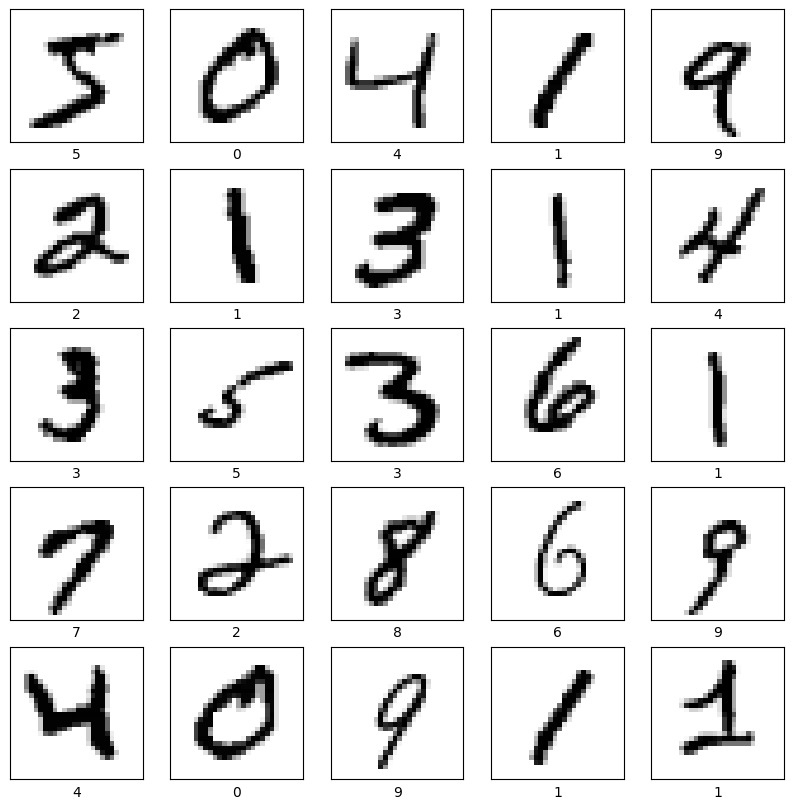

In [17]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range((numbers_to_display)):
  plt.subplot(num_cells,num_cells,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()


In [20]:
x_train_with_channel = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
    )
x_test_with_channel = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
    )

In [21]:
print('x_train_with_channel:',x_train_with_channel.shape)
print('x_test_with_channel:',x_test_with_channel.shape)


x_train_with_channel: (60000, 28, 28, 1)
x_test_with_channel: (10000, 28, 28, 1)


In [27]:
x_train_normalized = x_train_with_channel / 255
x_test_normalized = x_test_with_channel / 255

In [28]:
x_train_normalized[0][10]


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.05490196],
       [0.00392157],
       [0.60392157],
       [0.99215686],
       [0.35294118],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [29]:
model = tf.keras.models.Sequential()

In [32]:
model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 16)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,642 (818.91 KB)

 Trainable params: 209,642 (818.91 KB)

 Non-trainable params: 0 (0.00 B)

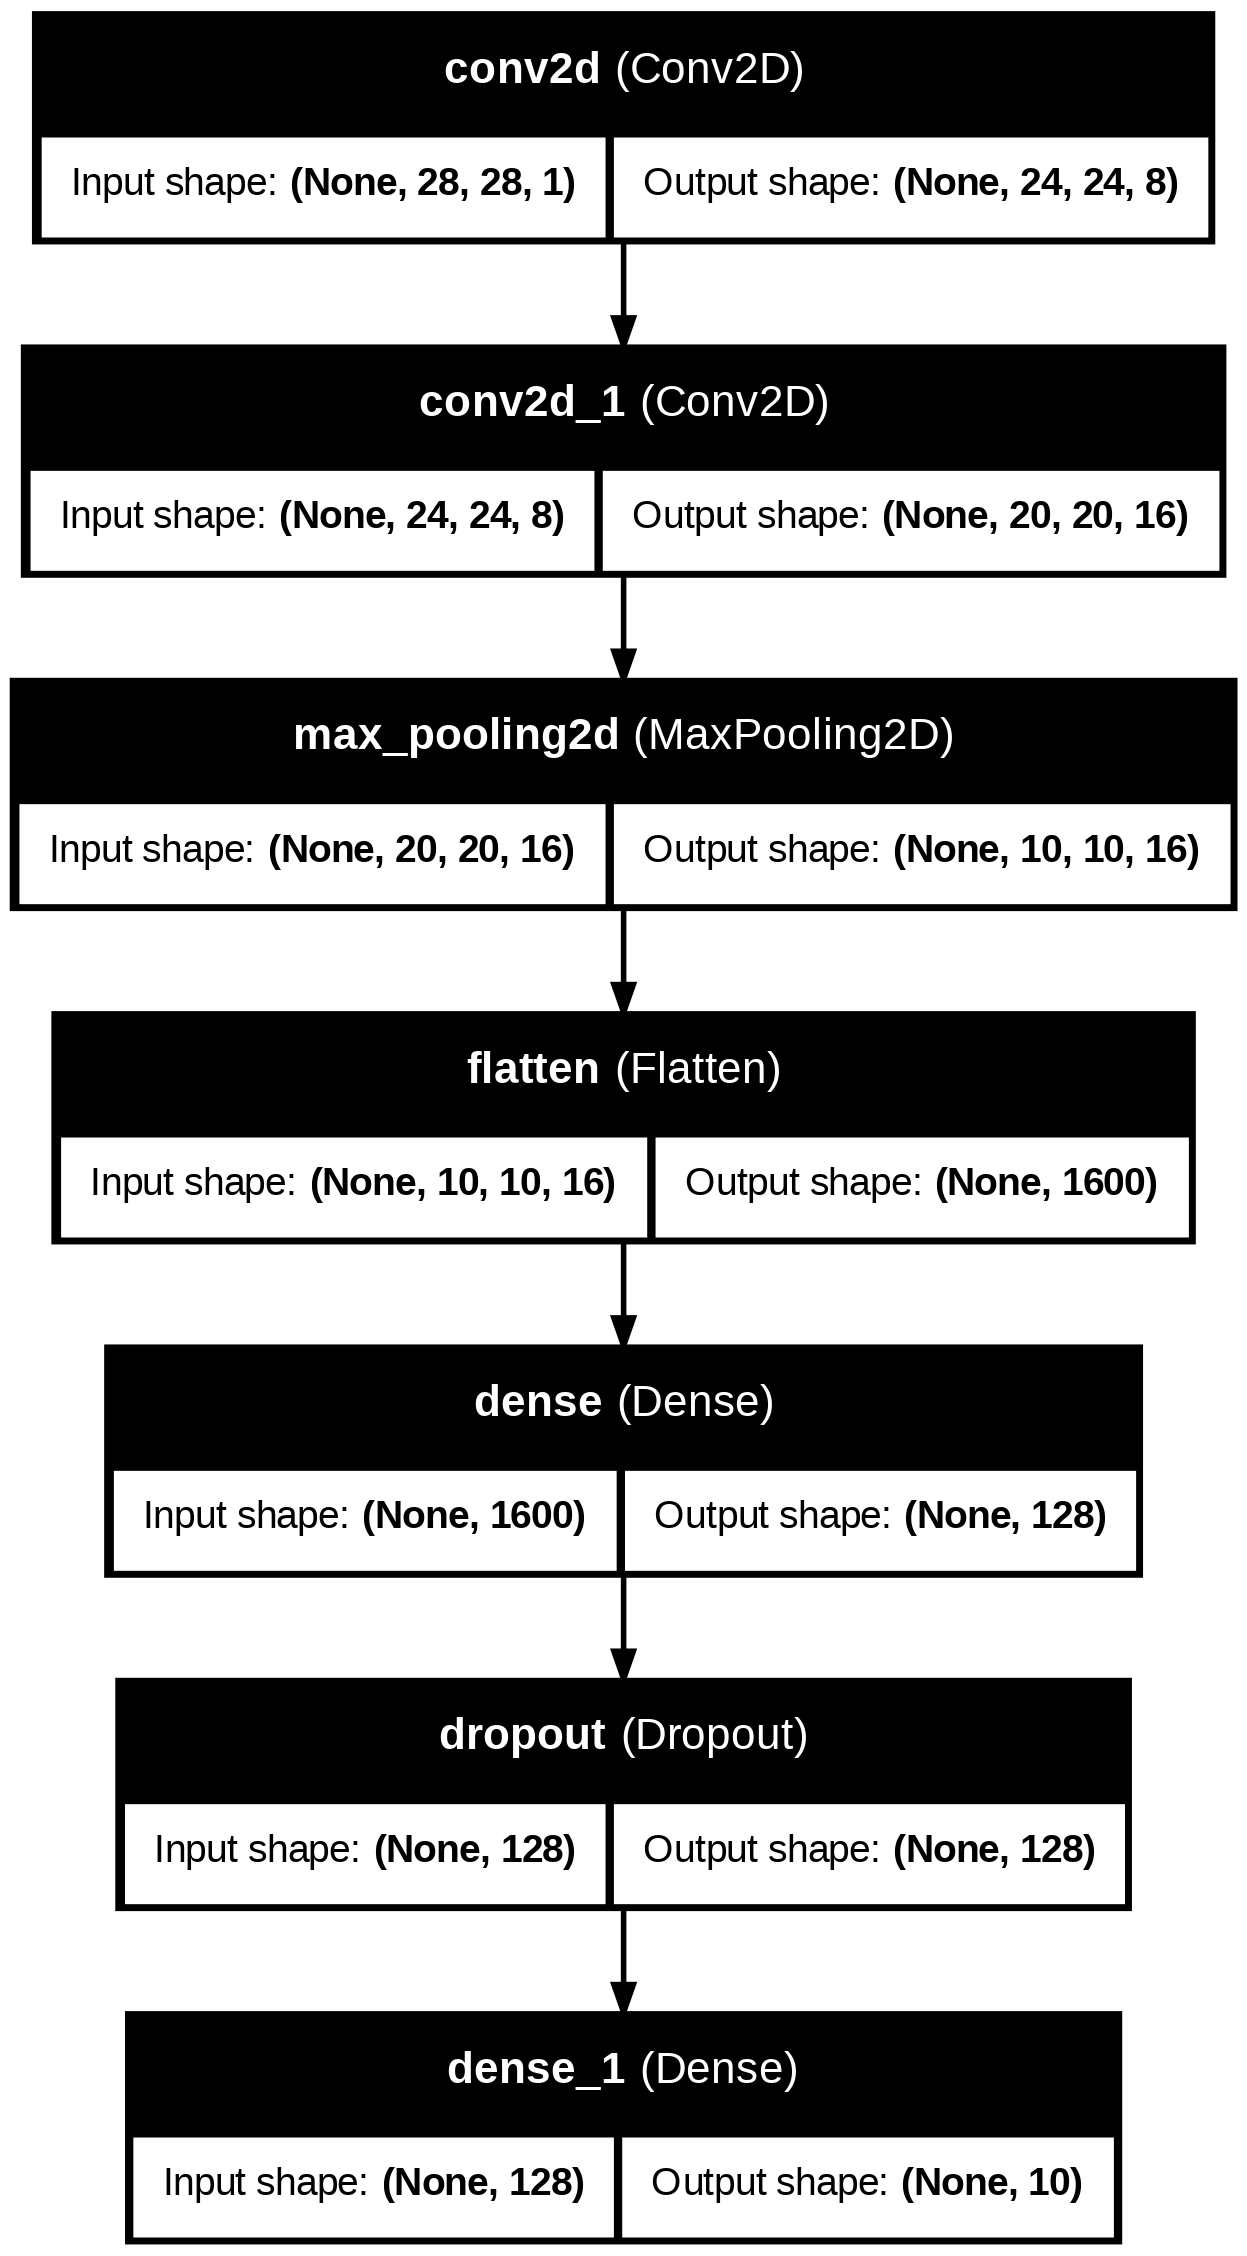

In [34]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,

)

In [35]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [38]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history=model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test,y_test),
    callbacks=[tensorboard_callback]
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.8181 - loss: 2.8574 - val_accuracy: 0.9685 - val_loss: 0.1111
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9635 - loss: 0.1248 - val_accuracy: 0.9701 - val_loss: 0.0994
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - accuracy: 0.9737 - loss: 0.0902 - val_accuracy: 0.9803 - val_loss: 0.0609
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9785 - loss: 0.0729 - val_accuracy: 0.9807 - val_loss: 0.0635
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9824 - loss: 0.0622 - val_accuracy: 0.9825 - val_loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9832 - loss: 0.0572 - val_accuracy: 0.9831 - val_loss: 0.0746
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9854 - loss: 0.0502 - val_accuracy: 0.9858 - val_loss: 0.0609
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9875 -

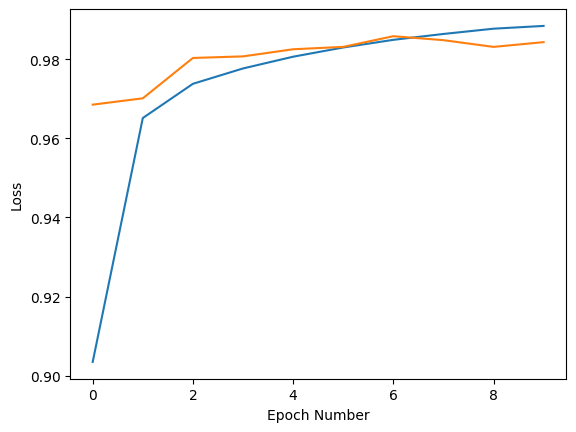

In [39]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])


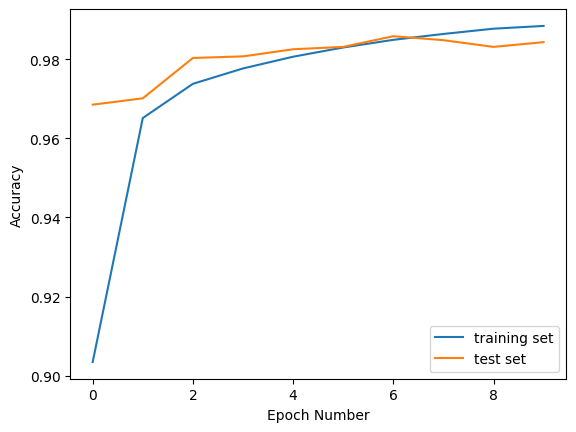

In [40]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()



In [41]:

%%capture
train_loss,train_accuracy=model.evaluate(x_train,y_train)
test_loss,test_accuracy=model.evaluate(x_test,y_test)



In [43]:
print('Train loss:',train_loss)
print('Train accuracy:',train_accuracy)
print('Test loss:',test_loss)
print('Test accuracy:',test_accuracy)

Train loss: 0.018709611147642136
Train accuracy: 0.9943833351135254
Test loss: 0.07645611464977264
Test accuracy: 0.9843000173568726


In [45]:
print('validation loss:',train_loss)
print('validation accuracy:',train_accuracy)
print('test loss:',test_loss)
print('test accuracy:',test_accuracy)



validation loss: 0.018709611147642136
validation accuracy: 0.9943833351135254
test loss: 0.07645611464977264
test accuracy: 0.9843000173568726


In [46]:
model_name='digit_reconition_cnn.h5'
model.save(model_name,save_format='h5')

In [47]:
loaded_model=tf.keras.models.load_model(model_name)

In [54]:
predictions_one_hot = loaded_model.predict(x_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [55]:
print('predictions_one_hot:',predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [57]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,0.124837,0.107962,0.103450,0.088457,0.080974,0.086337,0.067575,0.105686,0.125102,0.109619
1,0.124991,0.108347,0.103285,0.088026,0.081035,0.086280,0.067465,0.105547,0.125019,0.110003
2,0.124955,0.108569,0.103272,0.087852,0.081069,0.086241,0.067510,0.105398,0.125164,0.109969
3,0.125167,0.108107,0.103226,0.088318,0.080993,0.086289,0.067346,0.105827,0.125023,0.109705
4,0.124957,0.108964,0.103205,0.087640,0.081200,0.086393,0.067606,0.105184,0.125036,0.109814
...,...,...,...,...,...,...,...,...,...,...
9995,0.125100,0.107387,0.103319,0.088759,0.080845,0.086733,0.067546,0.106033,0.124597,0.109682
9996,0.125046,0.108203,0.103308,0.088143,0.080972,0.086345,0.067501,0.105552,0.125002,0.109929
9997,0.125076,0.108501,0.103321,0.087905,0.081027,0.086251,0.067644,0.105133,0.125377,0.109765
9998,0.124898,0.108509,0.103158,0.087943,0.081025,0.086172,0.067435,0.105435,0.125287,0.110137


In [58]:
predictions=np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,8
1,8
2,8
3,0
4,8
...,...
9995,0
9996,0
9997,8
9998,8


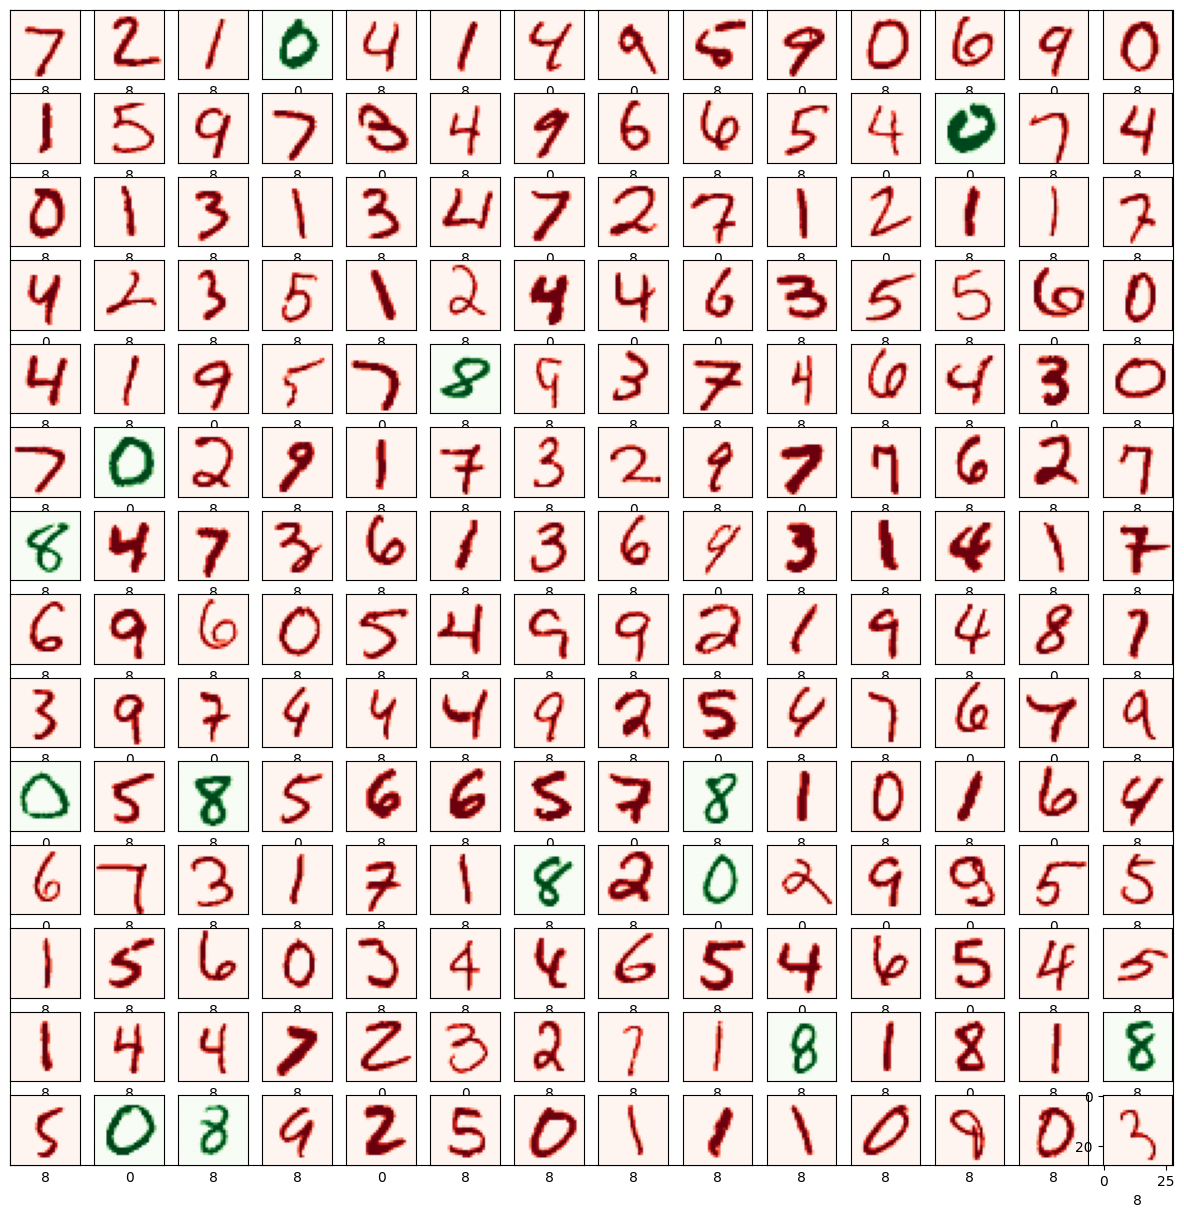

In [59]:

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map='Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)